In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# 1. Create non-linear data distribution

In [0]:
m = 200
class_A = np.random.normal(0, 1, [m, 2])
label_A = np.ones([m, 1])

class_B_x = np.random.normal(0, 2, [m, 1])
class_B_y = 0.5*class_B_x**2 - 3

class_B = np.concatenate([class_B_x, class_B_y], axis = 1)
label_B = np.zeros([m, 1])

In [46]:
class_B.shape

(200, 2)

In [48]:
print(label_A[:5])
print(label_B[:5])

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


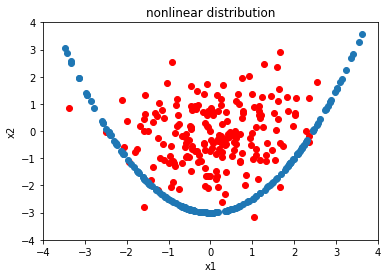

In [40]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_title('nonlinear distribution')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])

ax1.scatter(class_A[:,0], class_A[:,1], c='red')

ax1.scatter(class_B[:,0], class_B[:,1])
plt.show()

In [0]:
dataset = np.concatenate([class_A, class_B])

In [42]:
dataset.shape

(400, 2)

In [0]:
label = np.concatenate([label_A, label_B])

In [50]:
label.shape

(400, 1)

# 2. Build your classification model with Neural Network

In [0]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[2]),
    layers.Dense(16, activation='relu'),
    layers.Dense(2, activation='relu'),
    layers.Dense(1, activation='sigmoid')
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model

In [0]:
model = build_model()

In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 34        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 3         
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


# 3. Train your model

In [78]:
model.fit(dataset, label, epochs=500)

Train on 400 samples
Epoch 1/500
400/400 [==============================] - 0s 297us/sample - loss: 0.7241 - acc: 0.5150
Epoch 2/500
400/400 [==============================] - 0s 57us/sample - loss: 0.7011 - acc: 0.5800
Epoch 3/500
400/400 [==============================] - 0s 51us/sample - loss: 0.6926 - acc: 0.5925
Epoch 4/500
400/400 [==============================] - 0s 54us/sample - loss: 0.6854 - acc: 0.6100
Epoch 5/500
400/400 [==============================] - 0s 51us/sample - loss: 0.6765 - acc: 0.6625
Epoch 6/500
400/400 [==============================] - 0s 55us/sample - loss: 0.6667 - acc: 0.7225
Epoch 7/500
400/400 [==============================] - 0s 55us/sample - loss: 0.6534 - acc: 0.8375
Epoch 8/500
400/400 [==============================] - 0s 54us/sample - loss: 0.6400 - acc: 0.7600
Epoch 9/500
400/400 [==============================] - 0s 57us/sample - loss: 0.6259 - acc: 0.8250
Epoch 10/500
400/400 [==============================] - 0s 56us/sample - loss: 0.6099 -

# 4. Observe your new representation of dataset transformed by network

In [0]:
last_hidden_output_model = keras.Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [81]:
last_hidden_output_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 34        
Total params: 658
Trainable params: 658
Non-trainable params: 0
_________________________________________________________________


In [0]:
new_rep_A = last_hidden_output_model.predict(class_A)

In [83]:
new_rep_A.shape

(200, 2)

In [0]:
new_rep_B = last_hidden_output_model.predict(class_B)

In [85]:
new_rep_B.shape

(200, 2)

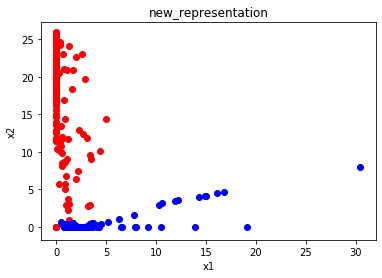

In [86]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_title('new_representation')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

ax1.scatter(new_rep_A[:,0], new_rep_A[:,1], c='red')

ax1.scatter(new_rep_B[:,0], new_rep_B[:,1], c='blue')
plt.show()